In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

There are 1338 rows and 7 columns in this dataset out of which is target column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In this dataset there are 2 integer, 3 objects and 2 floats data types

In [6]:
# I am checking unique values in this dataset
for i in df.columns:
    print(df[i].value_counts(),"\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64 

male      676
female    662
Name: sex, dtype: int64 

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 

no     1064
yes     274
Name: smoker, dtype: int64 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

The value counts in this dataset seem to be okay

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null value in this dataset

In [8]:
# Cheking Descrption of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#converting categorical data into continue data
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
df2=le.fit_transform(df['sex'])

In [12]:
pd.Series(df2)

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Length: 1338, dtype: int32

In [13]:
df['sex']=df2

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [15]:
df3=le.fit_transform(df['region'])

In [16]:
pd.Series(df3)

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Length: 1338, dtype: int32

In [17]:
df['region']=df3

In [18]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,3,16884.92400
1,18,1,33.770,1,no,2,1725.55230
2,28,1,33.000,3,no,2,4449.46200
3,33,1,22.705,0,no,1,21984.47061
4,32,1,28.880,0,no,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,1,10600.54830
1334,18,0,31.920,0,no,0,2205.98080
1335,18,0,36.850,0,no,2,1629.83350
1336,21,0,25.800,0,no,3,2007.94500


In [19]:
df4=le.fit_transform(df['smoker'])

In [20]:
pd.Series(df4)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Length: 1338, dtype: int32

In [21]:
df['smoker']=df4

In [22]:
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


Now all data have been converted into continues data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


Now there are 2 float, 3 int32 and 2 int64 dataset present

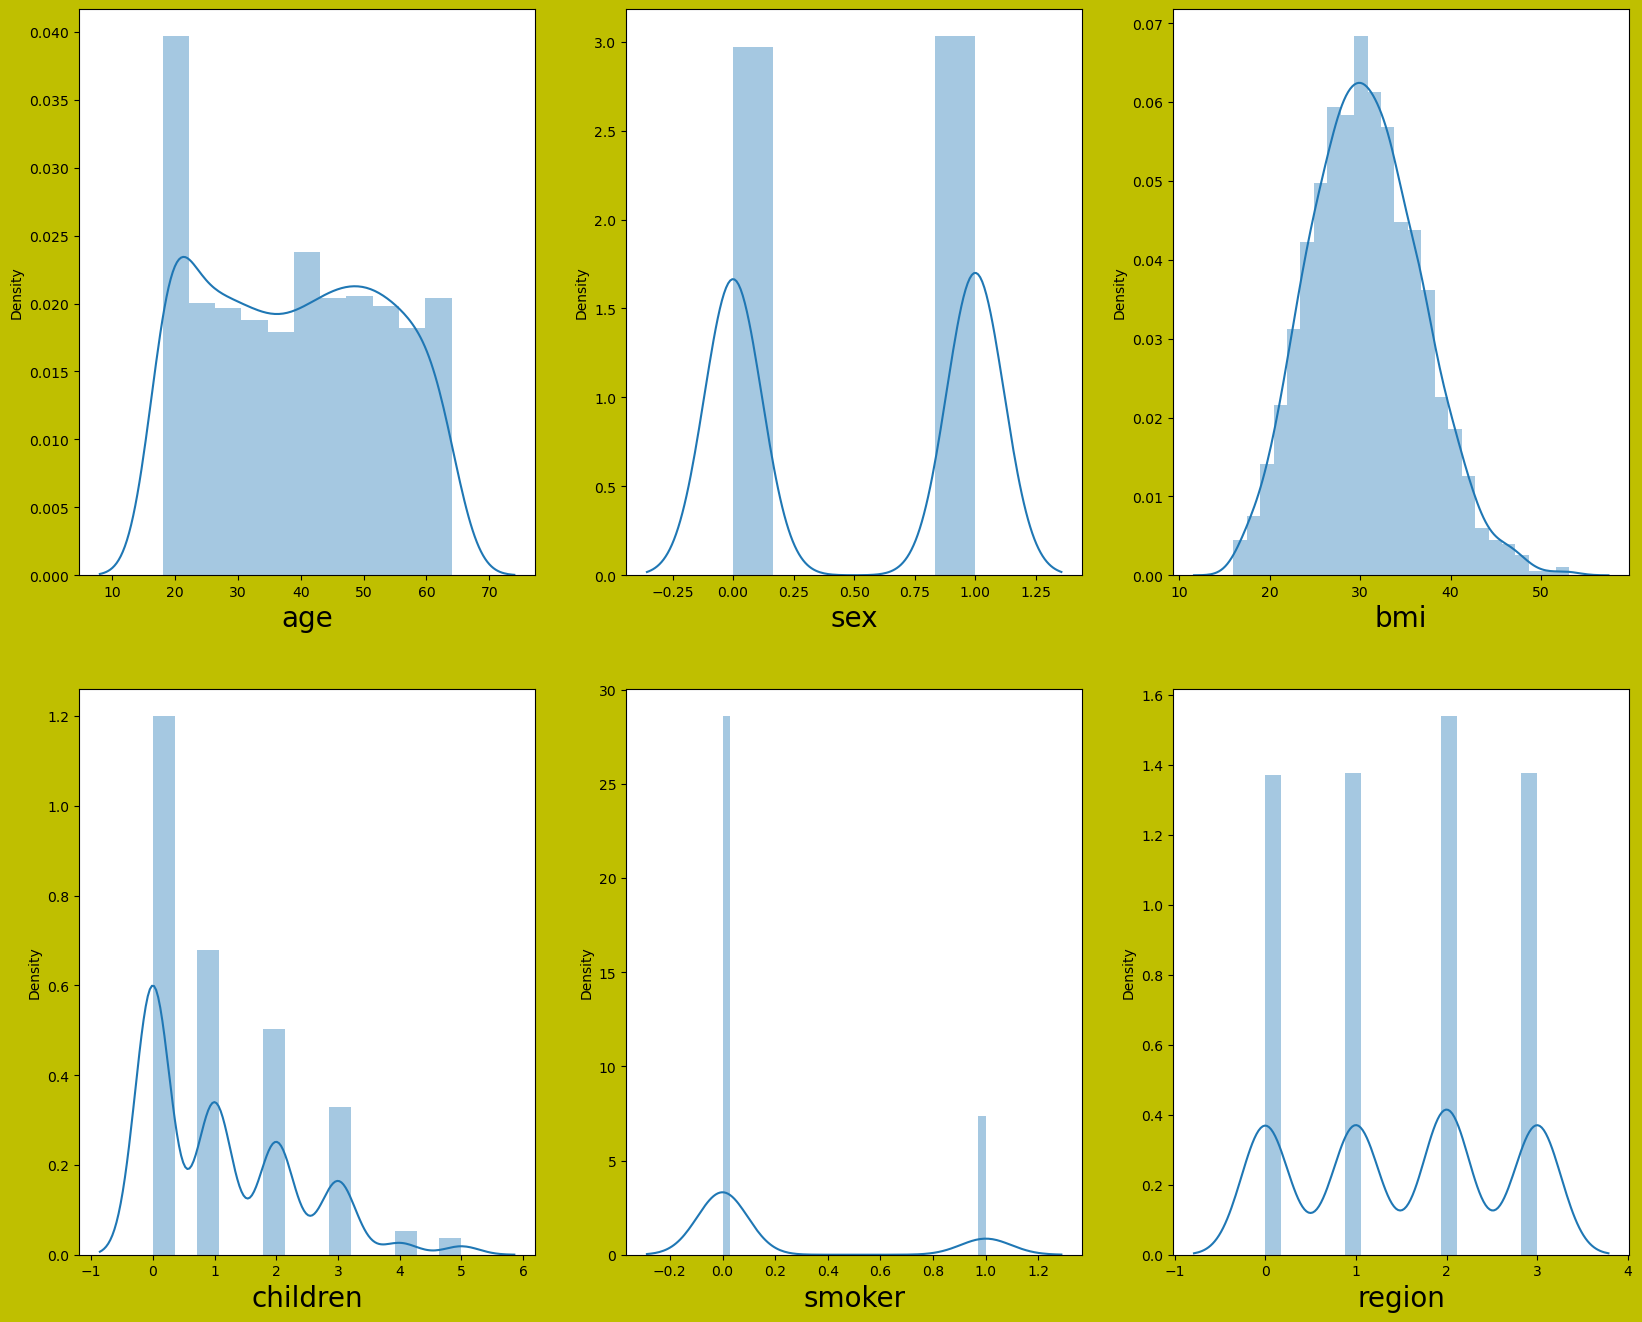

In [24]:
plt.figure(figsize=(20,25), facecolor='y')
plotnumber=1

for column in df:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

All data seems to be properly distributed.

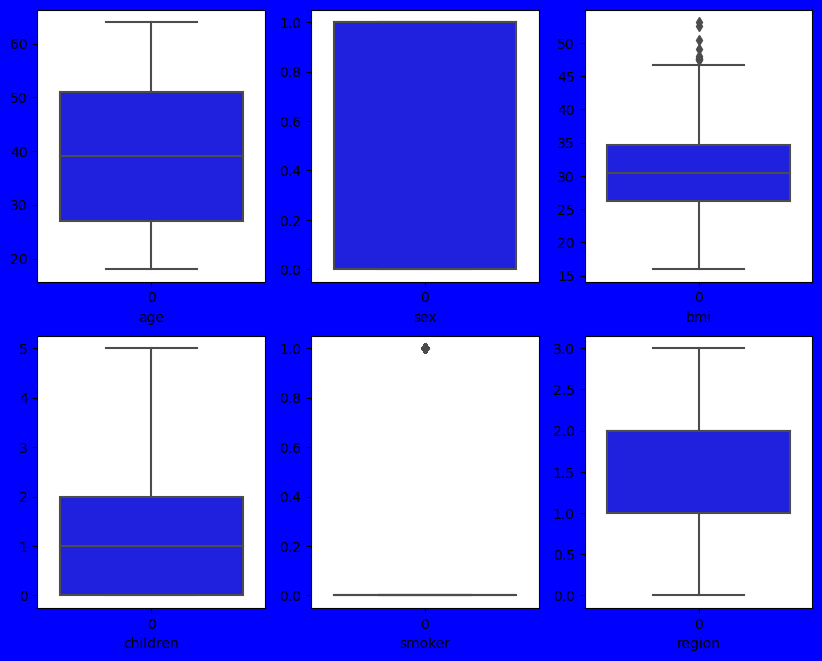

In [25]:
# Now I will check if there are any outliers present in features through box table.
plt.figure(figsize=(10,12), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In above plot I can see there are outliers present in 'bmi' column

In [26]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [28]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [29]:
bmi_high=(q3.bmi+(1.5*iqr.bmi))

In [30]:
bmi_high

47.290000000000006

In [31]:
bmi_index=np.where(df['bmi']>bmi_high)

In [32]:
bmi_index

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [33]:
df=df.drop(df.index[bmi_index])

In [34]:
df.shape

(1329, 7)

after applying IQR technique for removing outliers from bmi column we have lost 9 entries from the dataset. Now again I am cheking boxplt.

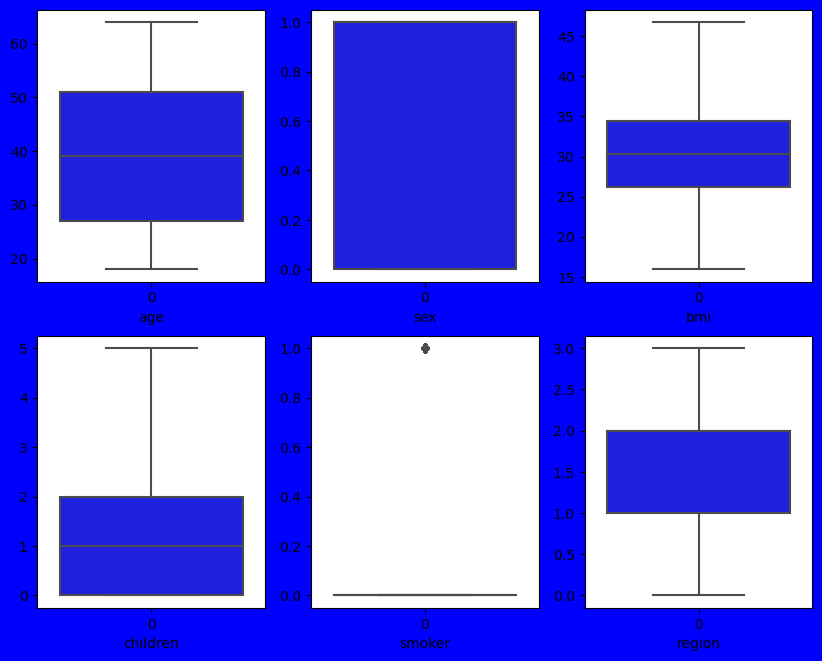

In [35]:
plt.figure(figsize=(10,12), facecolor='blue')
plotnumber=1

for i in df:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

Now above plot showing clearly that data is properly distributed 

In [37]:
# Now I will check correlation with features
corr=df.corr()

In [38]:
corr.shape

(7, 7)

In [39]:
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000


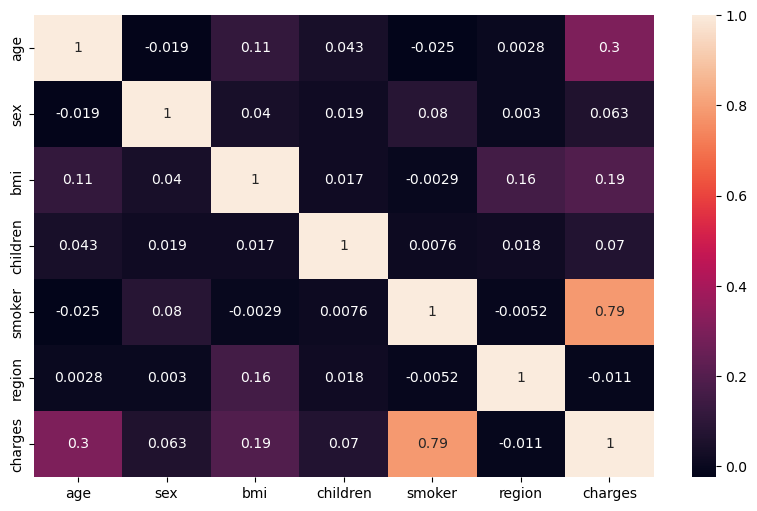

In [40]:
#Plotting heatmap to check correlation
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()

Above plot shows that there is no correlation with features.

Now I am ready to go to build models.

In [51]:
x=df.drop('charges', axis=1)
y=df.charges

In [52]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


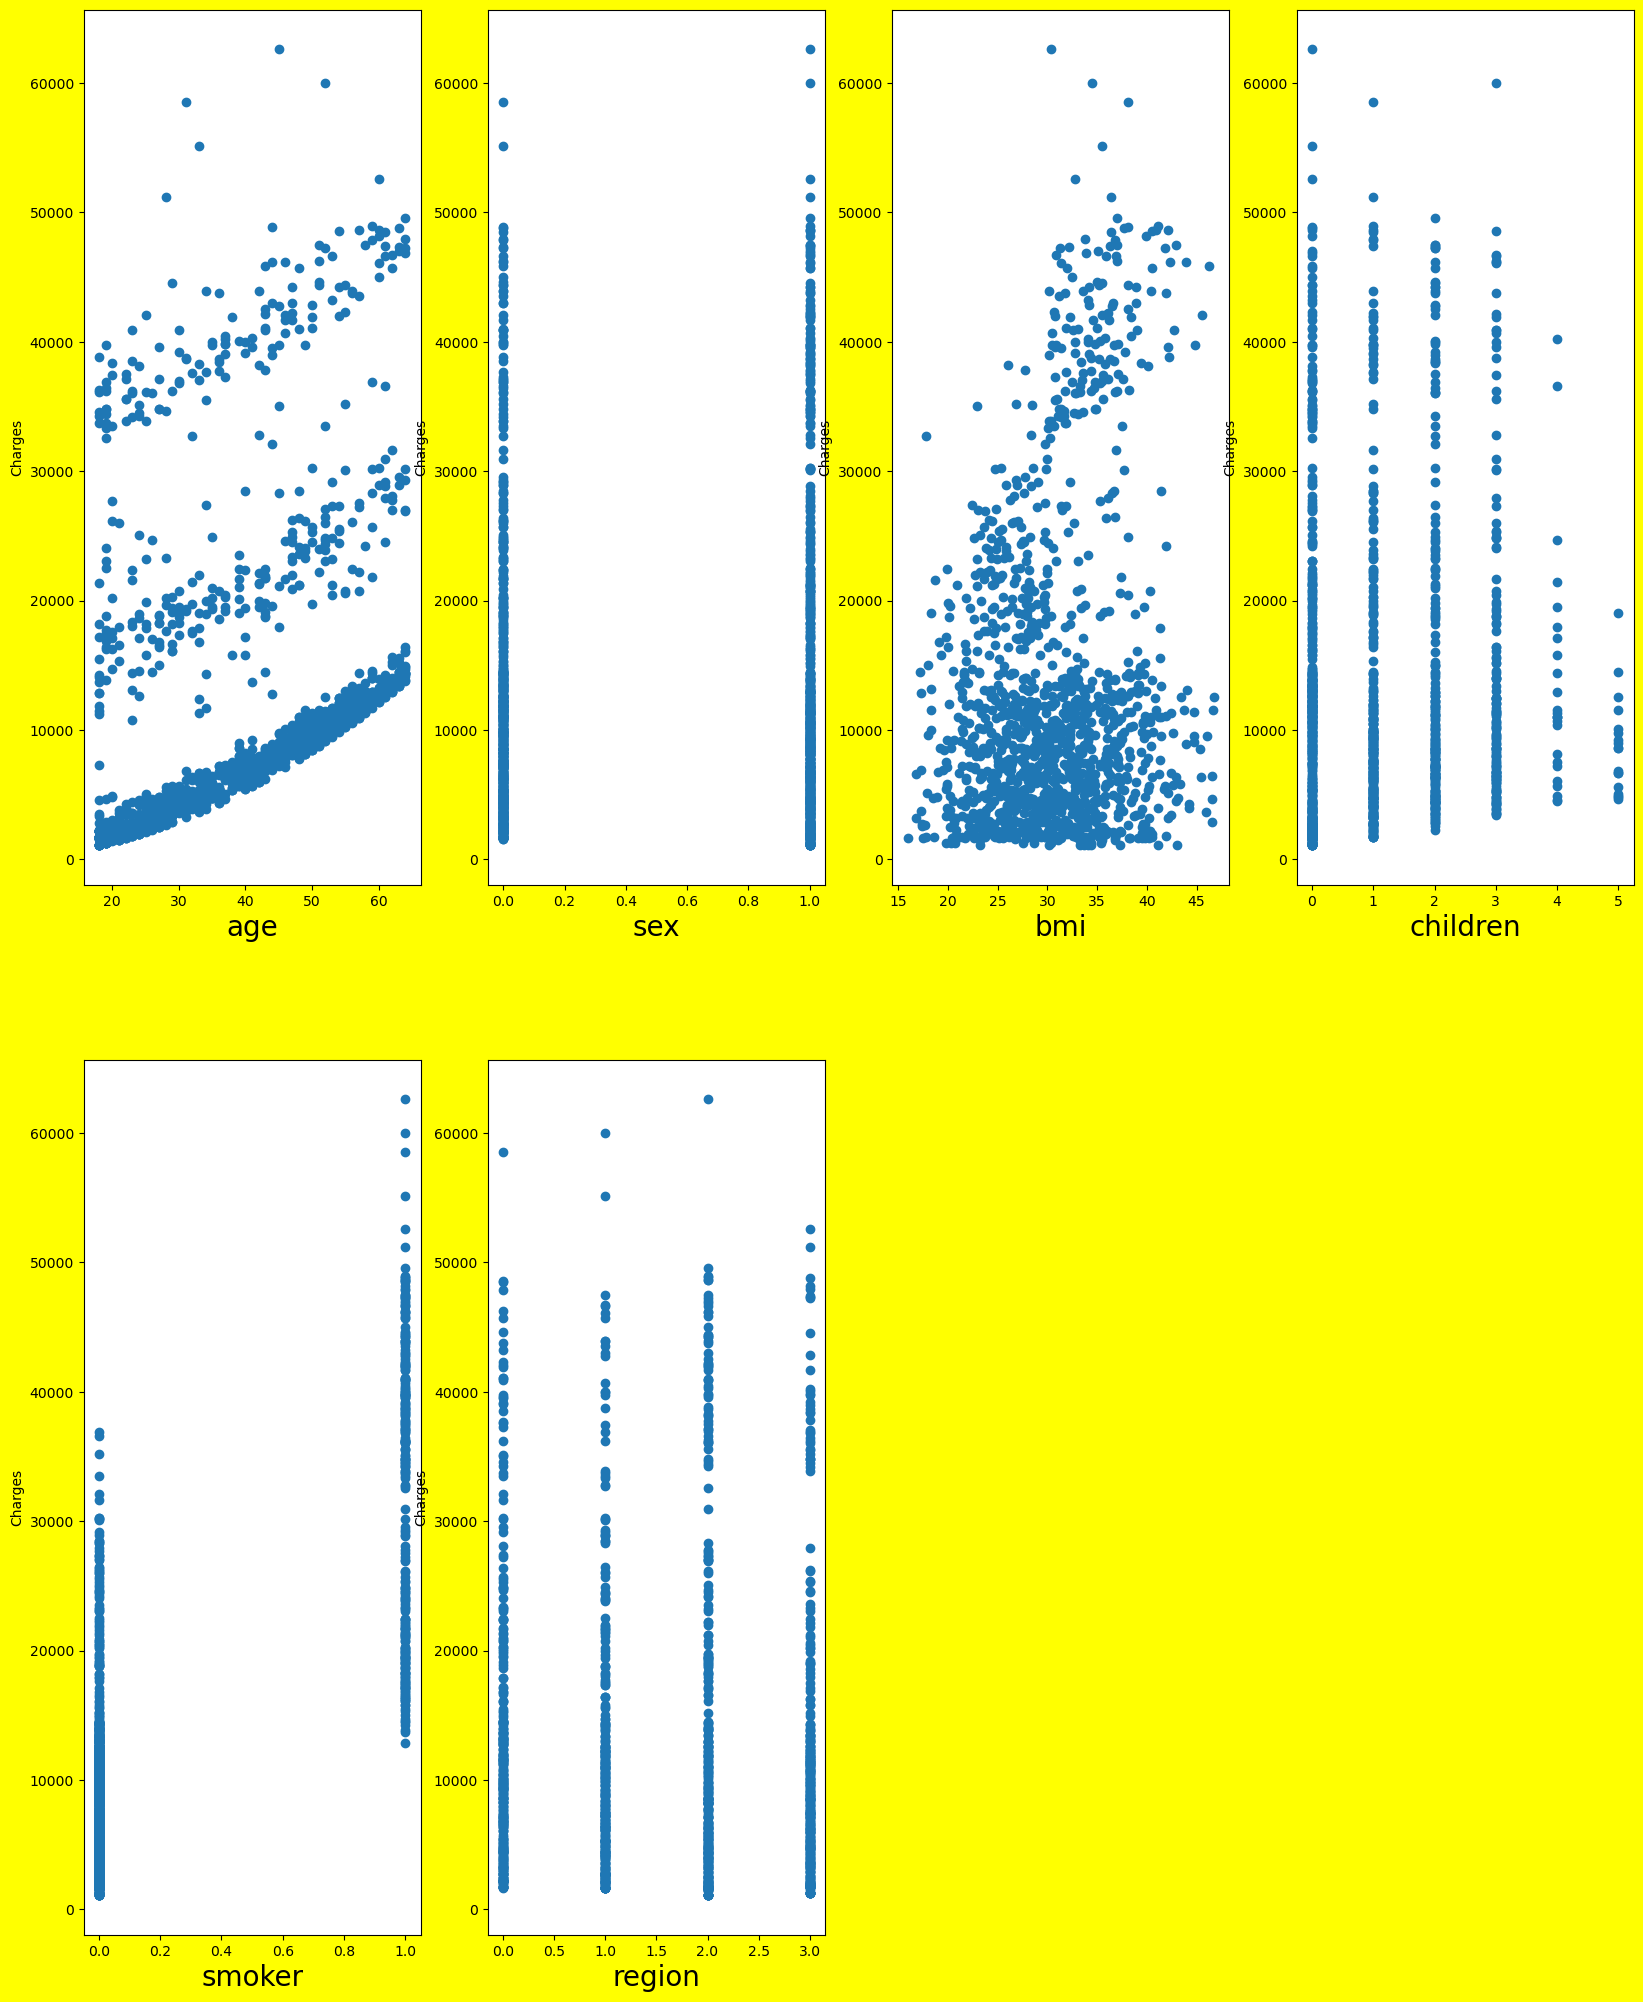

In [42]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Charges')
        
    plotnumber+=1
plt.show()

There is no relation of bmi column with target. Also region column is not shwoing any positive relationship with target. We need to remove these columns. 

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,7.654203,age
1,1.996685,sex
2,10.503999,bmi
3,1.803383,children
4,1.255550,smoker
5,2.913696,region


In [54]:
x=x.drop('region', axis=1)
x=x.drop('bmi', axis=1)

In [55]:
x

,age,sex,children,smoker
0,19,0,0,1
1,18,1,1,0
2,28,1,3,0
3,33,1,0,0
4,32,1,0,0
...,...,...,...,...
1333,50,1,3,0
1334,18,0,0,0
1335,18,0,0,0
1336,21,0,0,0


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [60]:
mxacc=0
mxrs=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.30, random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train, y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>mxacc:
        mxacc=acc
        mxrs=i
print("Best Accuracy score is :", mxacc, "at Random_state :", mxrs)

Best Accuracy score is : 0.7036168577261857 at Random_state : 22


In [61]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.30, random_state=mxrs)

In [62]:
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n===============================train result==============')
        print(f'R2 Score:{r2_score(y_train,y_pred)*100:2f}%')
           
    elif train==False:
        ypred=clf.predict(x_test)
        
        print('\n===============================test result==============')
        print(f'R2 Score:{r2_score(y_test,ypred)*100:2f}%')
            
        print("\nMean Absolute Error:", mean_absolute_error(y_test,ypred))
        print("\nMean Squared Error:", mean_squared_error(y_test,ypred))
        print("\nRoot Mean Squared Error:", np.sqrt(mean_squared_error(y_test,ypred)))

In [63]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
y_pred=lr.predict(x_train)

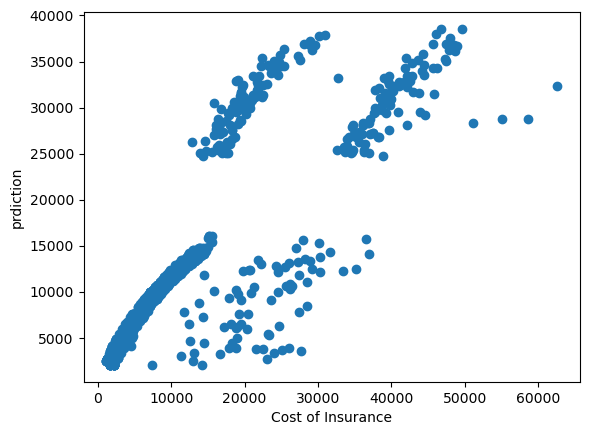

In [66]:
plt.scatter(y_train, y_pred)
plt.xlabel('Cost of Insurance')
plt.ylabel('prdiction')
plt.show()

In [67]:
metric_score(lr,x_train, x_test, y_train, y_test, train=True)
metric_score(lr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:69.165502%

===============================test result==============
R2 Score:78.483087%

Mean Absolute Error: 3810.079498057903

Mean Squared Error: 33966090.7148305

Root Mean Squared Error: 5828.043472283859


In [68]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [69]:
metric_score(rfr,x_train, x_test, y_train, y_test, train=True)
metric_score(rfr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:86.132728%

===============================test result==============
R2 Score:70.582094%

Mean Absolute Error: 3961.4651455512

Mean Squared Error: 46438412.53686817

Root Mean Squared Error: 6814.573540352189


In [70]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [71]:
metric_score(dtr,x_train, x_test, y_train, y_test, train=True)
metric_score(dtr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:88.718400%

===============================test result==============
R2 Score:60.846920%

Mean Absolute Error: 4228.218471362749

Mean Squared Error: 61806128.19625658

Root Mean Squared Error: 7861.68736317189


In [72]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [73]:
metric_score(dtr,x_train, x_test, y_train, y_test, train=True)
metric_score(dtr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:88.718400%

===============================test result==============
R2 Score:62.527681%

Mean Absolute Error: 4093.492801690653

Mean Squared Error: 59152918.380727015

Root Mean Squared Error: 7691.0934450653385


In [91]:
knn=KNN()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [92]:
metric_score(knn,x_train, x_test, y_train, y_test, train=True)
metric_score(knn,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:74.970276%

===============================test result==============
R2 Score:72.641353%

Mean Absolute Error: 3925.559673533835

Mean Squared Error: 43187714.433072634

Root Mean Squared Error: 6571.736028864263


In [93]:
ls=Lasso()
ls.fit(x_train, y_train)

Lasso()

In [94]:
metric_score(ls,x_train, x_test, y_train, y_test, train=True)
metric_score(ls,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:69.165499%

===============================test result==============
R2 Score:78.481944%

Mean Absolute Error: 3810.488311241256

Mean Squared Error: 33967894.57471661

Root Mean Squared Error: 5828.1982271296


In [97]:
rd=Ridge()
rd.fit(x_train, y_train)

Ridge()

In [98]:
metric_score(rd,x_train, x_test, y_train, y_test, train=True)
metric_score(rd,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:69.165416%

===============================test result==============
R2 Score:78.466283%

Mean Absolute Error: 3814.8045470981456

Mean Squared Error: 33992617.080944106

Root Mean Squared Error: 5830.318780387922


In [99]:
etr=ExtraTreesRegressor()
etr.fit(x_train, y_train)

ExtraTreesRegressor()

In [100]:
metric_score(etr,x_train, x_test, y_train, y_test, train=True)
metric_score(etr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:88.718400%

===============================test result==============
R2 Score:64.062281%

Mean Absolute Error: 4252.286757647931

Mean Squared Error: 56730434.76670553

Root Mean Squared Error: 7531.960884570865


In [101]:
svr=SVR()
svr.fit(x_train, y_train)

SVR()

In [102]:
metric_score(svr,x_train, x_test, y_train, y_test, train=True)
metric_score(svr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:-10.201632%

===============================test result==============
R2 Score:-8.640984%

Mean Absolute Error: 8465.32317220599

Mean Squared Error: 171498091.72967207

Root Mean Squared Error: 13095.727995406443


In [103]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [104]:
metric_score(gbr,x_train, x_test, y_train, y_test, train=True)
metric_score(gbr,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:74.927558%

===============================test result==============
R2 Score:76.196425%

Mean Absolute Error: 3863.0462552993226

Mean Squared Error: 37575761.5733149

Root Mean Squared Error: 6129.907142307696


In [105]:
y_pred=gbr.predict(x_train)

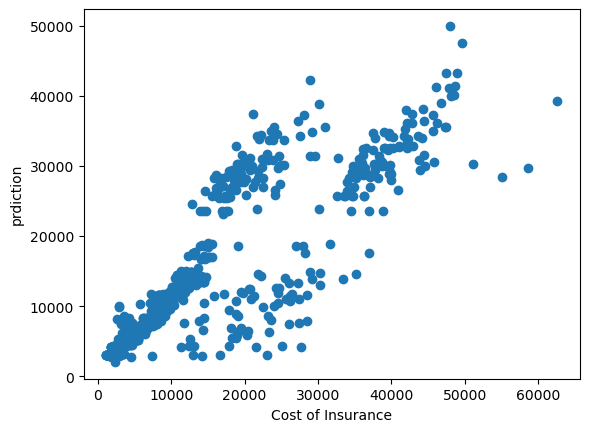

In [106]:
plt.scatter(y_train, y_pred)
plt.xlabel('Cost of Insurance')
plt.ylabel('prdiction')
plt.show()

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
ypredgbr=gbr.predict(x_test)
r2gbr=r2_score(y_test, ypredgbr)

In [109]:
r2gbr

0.7619642496047528

In [110]:
score=cross_val_score(gbr, x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Different Between R2 score and cross validation score: ', (r2gbr)-(score.mean()))

[0.72026362 0.68056182 0.70136612 0.6915388  0.7146664 ]
0.7016793524209148
Different Between R2 score and cross validation score:  0.060284897183838004


In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
param={'alpha':[1.0, 0.05,0.1,0.4,2],
       'fit_intercept':[True,False],
       'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
       'positive':[False,True],
       'random_state':[2,5,50,60,100]
      }

In [113]:
gbrcv=GridSearchCV(Ridge(),param, cv=5)
gbrcv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.1, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [2, 5, 50, 60, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [114]:
gbrcv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': True,
 'random_state': 2,
 'solver': 'auto'}

In [115]:
model=Ridge(alpha=2,fit_intercept=True, positive=True, random_state=2, solver='auto')

In [116]:
model.fit(x_train, y_train)
pred=model.predict(x_test)

In [117]:
metric_score(model,x_train, x_test, y_train, y_test, train=True)
metric_score(model,x_train, x_test, y_train, y_test, train=False)


===============================train result==============
R2 Score:69.165158%

===============================test result==============
R2 Score:78.449312%

Mean Absolute Error: 3819.488752193846

Mean Squared Error: 34019407.35385045

Root Mean Squared Error: 5832.615824297915


I think there is problem with dataset as I can see MAE, MSE & RMSE metrics are show very high value, It shows there is problem with dataset

In [119]:
import joblib

In [120]:
joblib.dump(model, open('Medical Cost Personal Insurance Project','wb'))